# WORKFLOW :-

data -> data pre-processing -> Train-test split -> svm Model -> approve model

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the dataset

In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

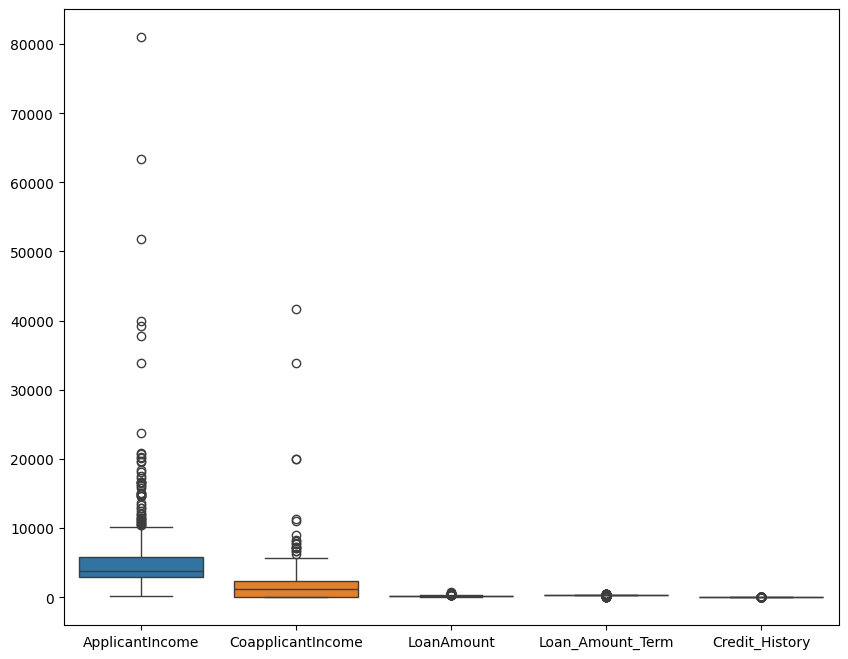

In [ ]:
#checking outliars here

plt.figure(figsize=(10,8))
sns.boxplot(data = df)

In [ ]:
#filling numerical data type NULL values with - Median
#mean is sensitive to outliar so choose median where outliar is high

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
#Filling Object data type null values
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# *Making a observation on each factor:-*


**On Gender**

NO. of male and female in loan applicant
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

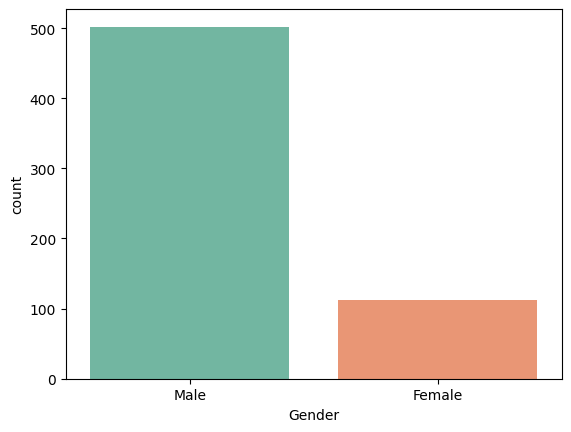

In [ ]:
print("NO. of male and female in loan applicant")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data = df,palette='Set2')

from above we can observe male applicant >> female applicant

**On maritial status**

No. of applicant based on maritial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

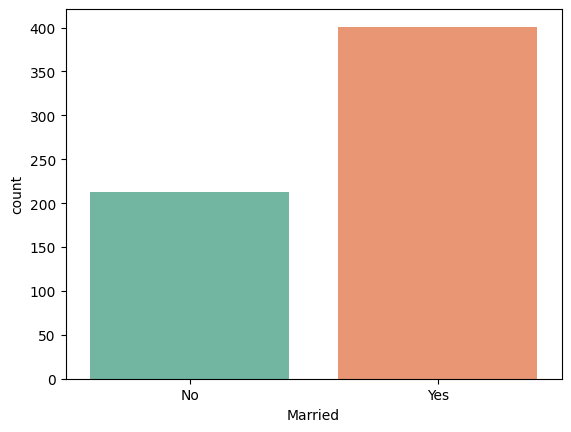

In [ ]:
print("No. of applicant based on maritial status")
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data = df,palette = 'Set2')

married applicant are nearly twice of unmarried ones

**On Education basis**

Loan applicants based on education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

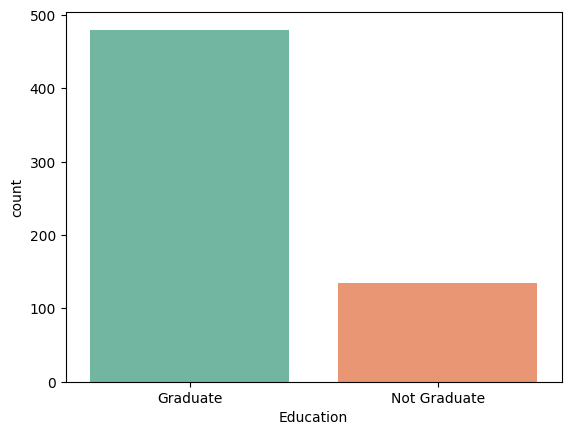

In [ ]:
print('Loan applicants based on education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df,palette = 'Set2')

Graduate applicants are nearly 4 times of ungraduate

**On Self Employment**

Loan applicants based on self employment
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

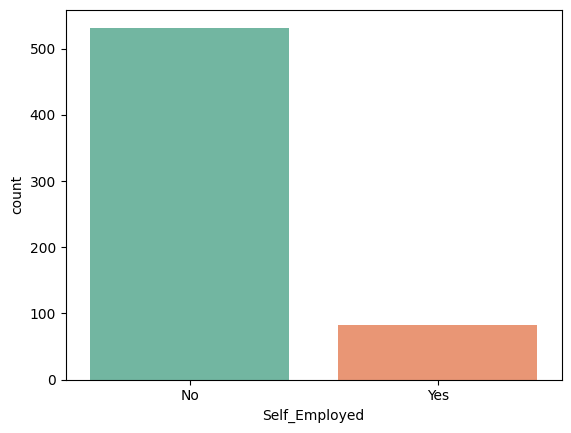

In [ ]:
print('Loan applicants based on self employment')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data = df,palette = 'Set2')

applicants who are not self employed applies for loan(nearly 6.5 times) than not self employed ones

# Finding Co relation among features

In [ ]:
corr = df.corr()
corr


ValueError: could not convert string to float: 'LP001002'

In [ ]:
corr = df.corr()
corr
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

ValueError: could not convert string to float: 'LP001002'

from above we can see, features are not highly correlated(since,all corr-values < 0.9).Therefore, there is no need to drop any column

# Feature Engineering

In [ ]:
#making a total applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


Total income,loan amount,loan amount term is too widely scattered, So applying log transformation,which will put them in a range and makes calc easy.

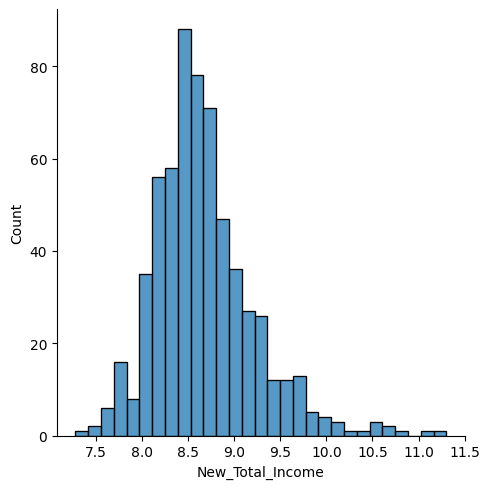

In [ ]:
#applying log transformation on total income

df['New_Total_Income'] = np.log(df['Total_Income']+1
                              )
sns.displot(df['New_Total_Income'])

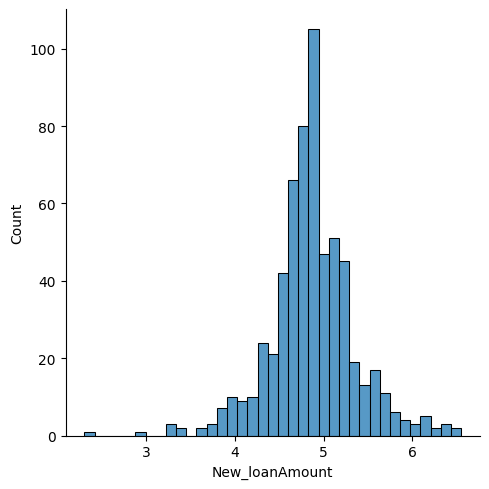

In [ ]:
#applying log transformation on total income

df['New_loanAmount'] = np.log(df['LoanAmount']+1)

sns.displot(df['New_loanAmount'])

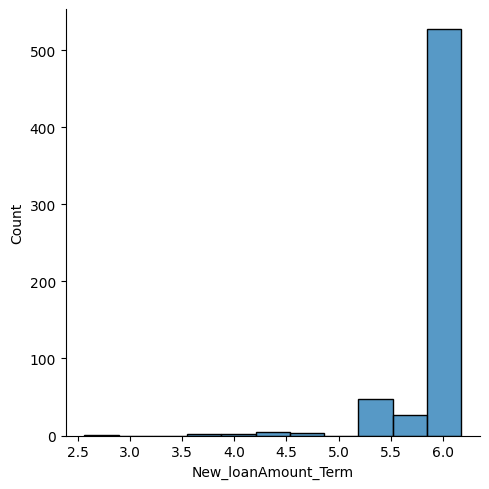

In [ ]:
#applying log transformation on total income

df['New_loanAmount_Term'] = np.log(df['Loan_Amount_Term']+1)

sns.displot(df['New_loanAmount_Term'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714732,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505525,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


Dropping unnecessary features i.e - app_income, coapp_income, loan_amount, Loan_Amount_Term

In [ ]:
col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = col,axis = 1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   New_Total_Income     614 non-null    float64
 9   New_loanAmount       614 non-null    float64
 10  New_loanAmount_Term  614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


Now we have to convert categorical/object type data to numerical data using encoding:
Encoding techniques:- Label encoding, One Hot encoding.

Label encoding:-a method of converting categorical variables into numerical values by assigning each unique category a unique integer.

One Hot encoding:-For each category, a binary column is created. The column corresponding to the category is marked as 1, and all other columns are marked as 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder
colm = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents',"Loan_Status"]
lblen = LabelEncoder()
for col in colm:
    df[col] = lblen.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,New_Total_Income,New_loanAmount,New_loanAmount_Term
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878
1,1,1,1,0,0,1.0,0,0,8.714732,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,8.505525,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int64  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    int64  
 7   Loan_Status          614 non-null    int64  
 8   New_Total_Income     614 non-null    float64
 9   New_loanAmount       614 non-null    float64
 10  New_loanAmount_Term  614 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


# Spliting dependant and independant features

In [ ]:
X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dividing dep,indep to training and testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 29)

# Different Algos/Model

# NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 81.62162162162161


## KNN



In [ ]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred4,y_test)
accuracy*100

74.5945945945946

In [ ]:
score = cross_val_score(model2,X,y,cv=8)
score


NameError: name 'model2' is not defined

In [ ]:
np.mean(score)*100

NameError: name 'score' is not defined

Here,by cross validation, accuracy get increases


#Report of all models

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report for {model_name}:\n{report}\n")

  generate_classification_report(model1,y_test,y_pred1)
  generate_classification_report(model2,y_test,y_pred2)
  generate_classification_report(model3,y_test,y_pred3)
  generate_classification_report(model4,y_test,y_pred4)

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
from scipy.stats import kendalltau
numeric_columns = ['New_loanAmount_Term', 'New_Total_Income', 'New_loanAmount']

# Calculate Kendall's Tau for each pair of numeric columns
results = {}
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        tau, p_value = kendalltau(df[col1], df[col2])
        results[(col1, col2)] = (tau, p_value)

# Output the results
for pair, (tau, p_value) in results.items():
    print(f"Kendall's Tau between {pair[0]} and {pair[1]}: {tau}, P-value: {p_value}")

Kendall's Tau between New_loanAmount_Term and New_Total_Income: -0.042106824034517744, P-value: 0.188251511806095
Kendall's Tau between New_loanAmount_Term and New_loanAmount: 0.04757532387309511, P-value: 0.13898453664525057
Kendall's Tau between New_Total_Income and New_loanAmount: 0.5283772053790711, P-value: 1.5618306051312227e-84
